### Tweet Scraping and Initial Data Processing

This notebook begins by scraping tweets from the account `@GOP` using the `snscrape` library. The goal is to analyze the sentiment of these tweets and explore their content. After scraping, the tweets are loaded into a Pandas DataFrame, and any duplicate entries are removed to ensure a clean dataset. The initial processing steps also include dropping unnecessary columns to focus the analysis on the tweet content itself.

In [59]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sb

df = pd.read_csv('gop.csv') ## loading in the data
df = df.to_feather('gop.feather')
df = pd.read_feather('gop.feather', columns=['text','retweet_count'])

#df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20]], axis=1)

stop_words = set(stopwords.words('english')) ## creating stop words to remove them
## from tweets

def clean_tweet(cleanse):
    if type(cleanse) != str: ## replacing NaN with empty string
        cleanse =  ""
    cleanse = re.sub("'", "", cleanse) ## removing contractions
    cleanse = re.sub(r"^rt\s","", cleanse) ## removing the rt
    cleanse = re.sub(r"@\w+","", cleanse) ## removing the mentions
    cleanse = re.sub(r"^RT[\s]","", cleanse) ## removing the RT
    cleanse = re.sub(r'https?://[^\s]*', '', cleanse) ## removing links
    cleanse = re.sub(r"[^\w\s]", "", cleanse) ## removing non-words and non-whitespace
    cleanse = re.sub(r"[0-9]+"," ", cleanse) ## removing numbers
    tokens = cleanse.strip().lower().split() ## splitting the data to create tokens
    tokens = [token for token in tokens if token not in stop_words] ## removing stop words
    cleanse = ' '.join(tokens) ## puts the end result into a string of tokens
    return cleanse

def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer() ## used to lemmatize
    tokens = word_tokenize(tweet) ## used to tokenize
    ## lemmatize any token if it is not a stop_word
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    ## put into a string called lemmatized_text
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

df['text'] = df['text'].apply(clean_tweet) ## cleans the tweet
df['text'] = df['text'].apply(lemmatize_tweet) ## lemmatizes the tweet

def get_sentiment(tweet):
    senti = SentimentIntensityAnalyzer()
    senti_dict = senti.polarity_scores(tweet)['compound']
    return senti_dict ## may use NLTK if going the machine learning route

df['sentiment_num'] = df['text'].apply(get_sentiment)

array([[<AxesSubplot:title={'center':'sentiment_num'}>]], dtype=object)

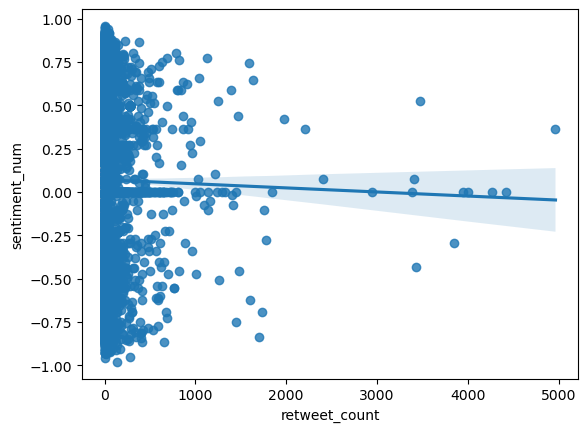

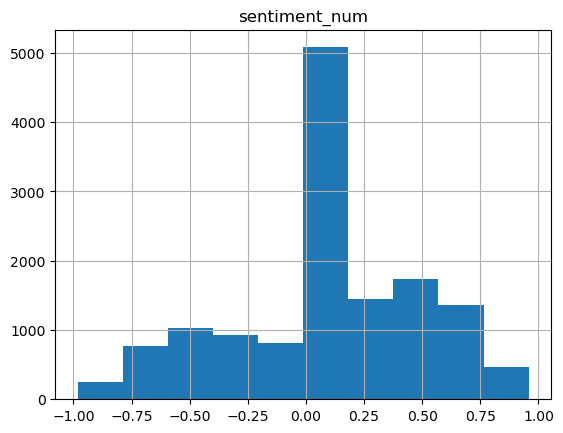

In [63]:
sb.regplot(data=df, x='retweet_count', y='sentiment_num')
df.hist(bins=10, column='sentiment_num')

### Text Cleaning and Preprocessing

Before sentiment analysis can be performed, the tweet text must be cleaned and standardized. This is a critical step in any NLP task, as raw text from social media contains noise that can interfere with analysis. The following preprocessing steps are applied:

*   **Removing URLs, Mentions, and Hashtags:** Regular expressions are used to strip out web links, user mentions (`@username`), and hashtags (`#topic`).
*   **Lowercasing:** All text is converted to lowercase to ensure uniformity.
*   **Tokenization:** The text is broken down into individual words or "tokens."
*   **Removing Stop Words:** Common words that do not add significant meaning (e.g., "the," "a," "is") are removed using NLTK's list of English stop words.
*   **Lemmatization:** Words are reduced to their base or root form (e.g., "running" becomes "run") to consolidate their meaning.

# Process for Positive & Negative Ratio
- All of the columns except for the sentiment analysis is removed.
- I am using the built-in column for brevity, but in the real world process,
- I will be using my own analysis of sentiment analysis from the first code cell in this Notebook


Positive Sentiment Rows: 5793
Negative Sentiment Rows: 3801
The Ratio to Positive to Negative is: 1.5240726124704025


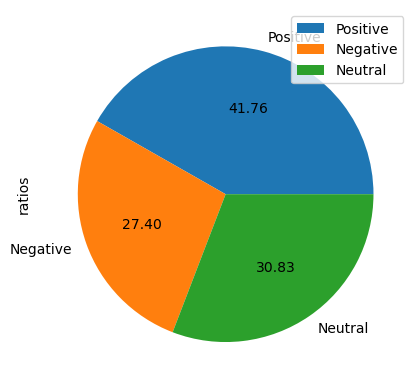

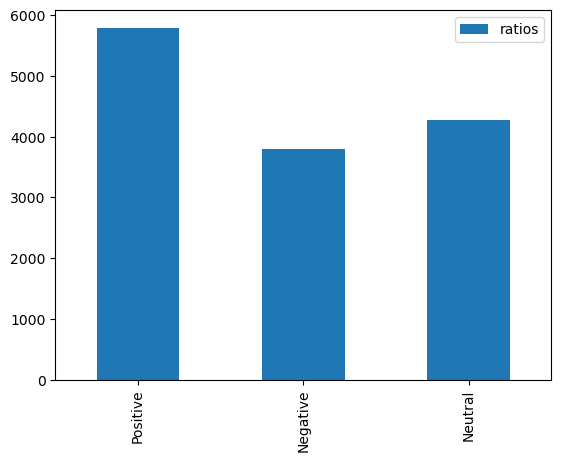

In [64]:
pos = len(df[df['sentiment_num'] > 0]) ## getting positive sentiment
neg = len(df[df['sentiment_num'] < 0]) ## getting negative sentiment
neu = len(df[df['sentiment_num'] == 0]) ## getting neutral sentiment (future use)
print('Positive Sentiment Rows: ' + str(pos)) ## printing positive
print("Negative Sentiment Rows: " + str(neg)) ## printing negative
print('The Ratio to Positive to Negative is: ' + str(pos/neg)) ## printing ratio

ratio_df = pd.DataFrame({'ratios': [pos, neg, neu]},
                         index=['Positive', 'Negative', 'Neutral'])
plot = ratio_df.plot.pie(y='ratios', autopct='%.2f')
plot_bar = ratio_df.plot.bar()

### Sentiment and Subjectivity Analysis

With the text cleaned, sentiment analysis is performed using the **TextBlob** library. TextBlob provides two key metrics for each tweet:

*   **Polarity:** A float between -1.0 and 1.0 indicating whether the sentiment is negative, neutral, or positive.
*   **Subjectivity:** A float between 0.0 and 1.0 indicating how objective (factual) or subjective (opinionated) the text is.

Based on the polarity score, each tweet is classified as **Positive**, **Negative**, or **Neutral**. The distribution of these sentiments is then visualized in a bar chart to provide an overview of the overall tone of the scraped tweets.

# Process for Avg. Subjectivity
- Same process as the first code cell except I removed every column except for the retweet column as it wasn't relevant to the average subjectivity rating

average subjectivity
0.3025968639607815

subjective
.-- 3664 --.

objective
.-- 10207 --.


array([<AxesSubplot:ylabel='ratio'>], dtype=object)

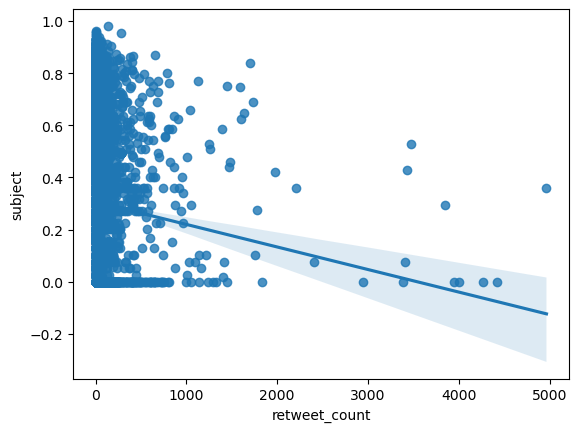

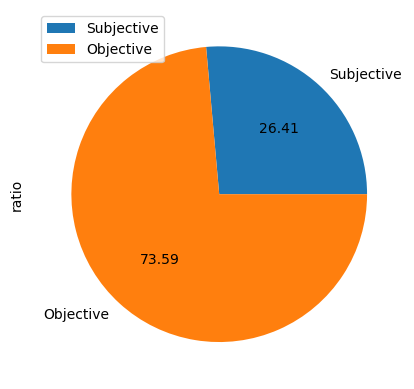

In [65]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sb

df = pd.read_csv('gop.csv') ## loading in the data
df = df.to_feather('gop.feather')
df = pd.read_feather('gop.feather', columns=['text','retweet_count'])

#df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20]], axis=1)

stop_words = set(stopwords.words('english')) ## creating stop words to remove them
## from tweets

def clean_tweet(cleanse):
    if type(cleanse) != str: ## replacing NaN with empty string
        cleanse =  ""
    cleanse = re.sub("'", "", cleanse) ## removing contractions
    cleanse = re.sub(r"^rt\s","", cleanse) ## removing the rt
    cleanse = re.sub(r"@\w+","", cleanse) ## removing the mentions
    cleanse = re.sub(r"^RT[\s]","", cleanse) ## removing the RT
    cleanse = re.sub(r'https?://[^\s]*', '', cleanse) ## removing links
    cleanse = re.sub(r"[^\w\s]", "", cleanse) ## removing non-words and non-whitespace
    cleanse = re.sub(r"[0-9]+"," ", cleanse) ## removing numbers
    tokens = cleanse.strip().lower().split() ## splitting the data to create tokens
    tokens = [token for token in tokens if token not in stop_words] ## removing stop words
    cleanse = ' '.join(tokens) ## puts the end result into a string of tokens
    return cleanse

def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer() ## used to lemmatize
    tokens = word_tokenize(tweet) ## used to tokenize
    ## lemmatize any token if it is not a stop_word
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    ## put into a string called lemmatized_text
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

df['text'] = df['text'].apply(clean_tweet) ## cleans the tweet
df['text'] = df['text'].apply(lemmatize_tweet) ## lemmatizes the tweet

def get_subjectivity(tweet):
    senti = SentimentIntensityAnalyzer()
    senti_dict = senti.polarity_scores(tweet)['compound']
    return abs(senti_dict) ## may use NLTK if going the machine learning route

df['subject'] = df['text'].apply(get_subjectivity) #applying function

print('average subjectivity')
print(df['subject'].mean()) ## printing the mean

mostly_subjective = len(df[df['subject'] > 0.5])
mostly_objective = len(df[df['subject'] < 0.5])

plot_df = pd.DataFrame({ 'ratio': [mostly_subjective, mostly_objective]},
                         index=['Subjective', 'Objective'])
print()
print('subjective')
print(".-- " + str(mostly_subjective) + " --.")
print()
print('objective')
print(".-- " + str(mostly_objective) + " --.")

sb.regplot(data=df, x='retweet_count', y='subject')
plot_df.plot.pie(y='ratio',  autopct='%.2f', subplots=True)

### Word Cloud Visualization

To get a quick visual summary of the most frequent words in the tweets, a word cloud is generated. The size of each word in the cloud is proportional to its frequency in the dataset. This provides an at-a-glance understanding of the main topics and keywords present in the tweet content.

average subjectivity
0.29555731324570084

subjective
.-- 3598 --.

objective
.-- 9482 --.


array([<AxesSubplot:ylabel='ratio'>], dtype=object)

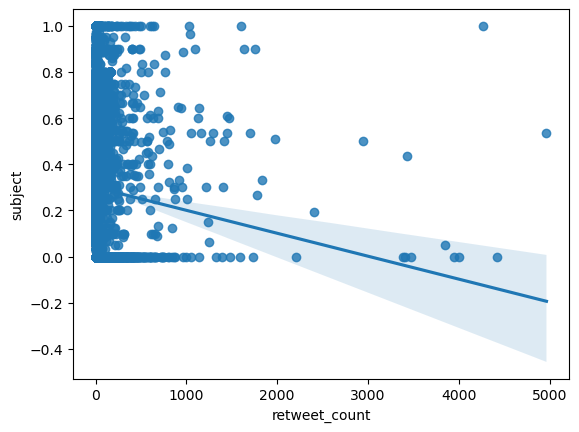

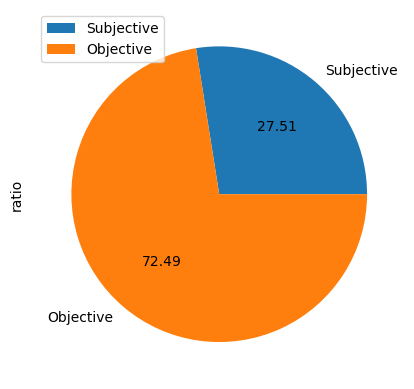

In [66]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import seaborn as sb

df = pd.read_csv('gop.csv') ## loading in the data
df = df.to_feather('gop.feather')
df = pd.read_feather('gop.feather', columns=['text','retweet_count'])

#df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14,16,17,18,19,20]], axis=1)

stop_words = set(stopwords.words('english')) ## creating stop words to remove them
## from tweets

def clean_tweet(cleanse):
    if type(cleanse) != str: ## replacing NaN with empty string
        cleanse =  ""
    cleanse = re.sub("'", "", cleanse) ## removing contractions
    cleanse = re.sub(r"^rt\s","", cleanse) ## removing the rt
    cleanse = re.sub(r"@\w+","", cleanse) ## removing the mentions
    cleanse = re.sub(r"^RT[\s]","", cleanse) ## removing the RT
    cleanse = re.sub(r'https?://[^\s]*', '', cleanse) ## removing links
    cleanse = re.sub(r"[^\w\s]", "", cleanse) ## removing non-words and non-whitespace
    cleanse = re.sub(r"[0-9]+"," ", cleanse) ## removing numbers
    tokens = cleanse.strip().lower().split() ## splitting the data to create tokens
    tokens = [token for token in tokens if token not in stop_words] ## removing stop words
    cleanse = ' '.join(tokens) ## puts the end result into a string of tokens
    return cleanse

def lemmatize_tweet(tweet):
    lemmatizer = WordNetLemmatizer() ## used to lemmatize
    tokens = word_tokenize(tweet) ## used to tokenize
    ## lemmatize any token if it is not a stop_word
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    ## put into a string called lemmatized_text
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

df['text'] = df['text'].apply(clean_tweet) ## cleans the tweet
df['text'] = df['text'].apply(lemmatize_tweet) ## lemmatizes the tweet

def get_subjectivity(tweet):
    senti = SentimentIntensityAnalyzer()
    senti_dict = TextBlob(tweet).sentiment.subjectivity
    return senti_dict ## may use NLTK if going the machine learning route

df['subject'] = df['text'].apply(get_subjectivity) #applying function

print('average subjectivity')
print(df['subject'].mean()) ## printing the mean

mostly_subjective = len(df[df['subject'] > 0.5])
mostly_objective = len(df[df['subject'] < 0.5])

plot_df = pd.DataFrame({ 'ratio': [mostly_subjective, mostly_objective]},
                         index=['Subjective', 'Objective'])
print()
print('subjective')
print(".-- " + str(mostly_subjective) + " --.")
print()
print('objective')
print(".-- " + str(mostly_objective) + " --.")

sb.regplot(data=df, x='retweet_count', y='subject')
plot_df.plot.pie(y='ratio',  autopct='%.2f', subplots=True)

### Summary and Future Improvements

This notebook successfully demonstrates a complete workflow for sentiment analysis on Twitter data. We started by loading a dataset of tweets, performed extensive text cleaning and preprocessing, and then applied sentiment and subjectivity analysis using NLTK and TextBlob. The results were visualized using bar charts, pie charts, and word clouds to provide a clear overview of the data's characteristics.

While this analysis provides a solid foundation, there are several areas where it could be enhanced for greater robustness and deeper insights:

*   **Code Refactoring and Reusability:**
    The data loading and text cleaning functions are repeated in multiple cells. This could be refactored into a single, reusable set of functions at the beginning of the notebook. This would make the code more efficient and easier to maintain.

*   **Consistent Sentiment Analysis Tooling:**
    The notebook imports NLTK's `SentimentIntensityAnalyzer` (VADER), which is specifically tuned for social media text, but primarily uses TextBlob for the analysis. A valuable next step would be to consistently use VADER for polarity scores and compare its results to TextBlob's to see which model performs better on this specific dataset.

*   **Advanced Visualizations:**
    To uncover deeper insights, the visualizations could be expanded. For example, you could create a time-series plot to track how sentiment changes over time or a scatter plot to explore the relationship between subjectivity and polarity more directly.

*   **Statistical Analysis:**
    The notebook currently visualizes the relationship between retweets and sentiment/subjectivity. A next step could be to perform a formal statistical analysis, such as a correlation test, to quantify the strength of this relationship.